#Auto Keras:
A toolkit created in 2019 facilitates ANN model buidling. It gives out the best performing ANN architecture for your dataset. It supports:

- Structured Data Classification & Regression
- Image and Text Classification

This project demonstrates classification on structured data. 

# Installing

In [1]:
!sudo pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc1) to /tmp/pip-req-build-anqhhnm1
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-anqhhnm1
  Running command git checkout -q 0fb69434a132093518e0e53d40020145ae192629
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1-py3-none-any.whl size=85445 sha256=062ecf7c5941d757473efe3110f27e77b13ecefae96b685cb336226d0d737c64
  Stored in directory: /tmp/pip-ephem-wheel-cache-4q733jg8/wheels/44/e5/92/e83049ca00432aec622a4fa0200e254d88aefae9d74aa86941
Successfully built keras-tuner


In [2]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.3 MB/s 
     |████████████████████████████████| 135 kB 50.1 MB/s 
     |████████████████████████████████| 1.6 MB 51.5 MB/s 
  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.0.2rc1
    Uninstalling keras-tuner-1.0.2rc1:
      Successfully uninstalled keras-tuner-1.0.2rc1


In [3]:
!pip show autokeras

Name: autokeras
Version: 1.0.20
Summary: AutoML for deep learning
Home-page: http://autokeras.com
Author: DATA Lab, Keras Team
Author-email: jhfjhfj1@gmail.com
License: Apache License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: packaging, tensorflow, pandas, keras-tuner
Required-by: 


# Structured Data Classification
##Dataset source:-

https://www.kaggle.com/andrewmvd/fetal-health-classification

Classification of multi-class dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import plot_model

In [5]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!wget 'https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/fetal_health.csv'

--2022-09-08 07:29:39--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/fetal_health.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228715 (223K) [text/plain]
Saving to: ‘fetal_health.csv’

fetal_health.csv    100%[===================>] 223.35K  --.-KB/s    in 0.03s   

2022-09-08 07:29:39 (8.63 MB/s) - ‘fetal_health.csv’ saved [228715/228715]



In [7]:
df=pd.read_csv('/content/fetal_health.csv')

In [8]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [9]:
df.isnull().sum().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

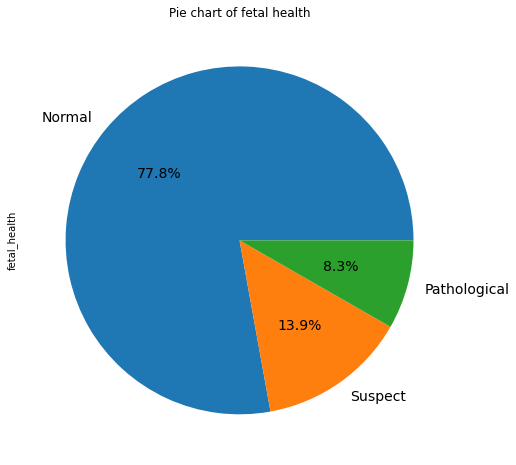

In [11]:
df2=df.copy(deep=True)
pie1=pd.DataFrame(df2['fetal_health'].replace(1.0,'Normal').replace(2.0,'Suspect').replace(3.0,'Pathological').value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Pie chart of fetal health',y = 'fetal_health', 
          autopct='%1.1f%%', shadow=False, labels=pie1['index'], legend = False, fontsize=14, figsize=(8,8))

The data is imbalanced. 

Before balancing the dataset, let us look at 
a heatmap for coorelation coefficient of each feature with the label.

(0.0, 22.0)

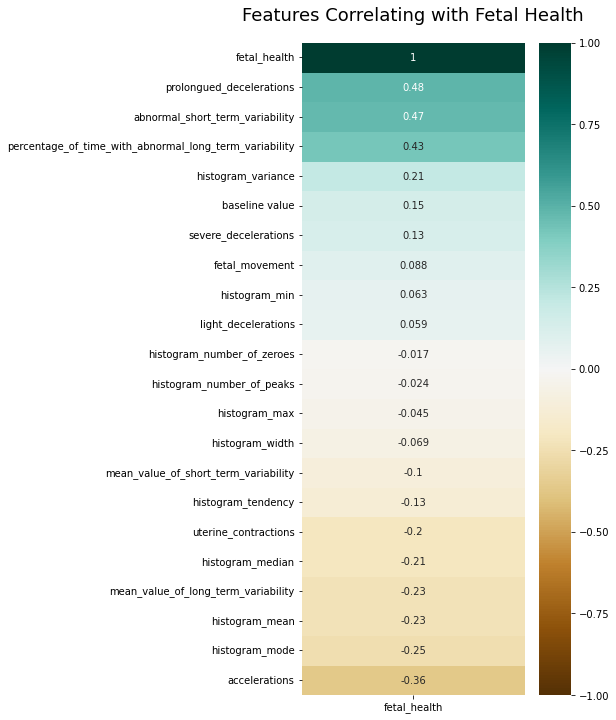

In [12]:
plt.figure(figsize=(5, 12))
heatmap = sns.heatmap(df.corr()[['fetal_health']].sort_values(by='fetal_health', ascending=True), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Fetal Health', fontdict={'fontsize':18}, pad=22)
heatmap.set_ylim([0,22])

In [13]:
features = df.iloc[:,:-1]
label=df['fetal_health']

In [14]:
features.shape, label.shape

((2126, 21), (2126,))

Let us apply polynomial features to increase the data significance

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
pf = PolynomialFeatures(degree=2, include_bias=False)
df3 = pf.fit_transform(features)

In [17]:
df3.shape

(2126, 252)

In [18]:
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(features.columns,p) for p in pf.powers_]]
output_df = pd.DataFrame(df3, columns = target_feature_names)

In [19]:
output_df.head()

,baseline value^1,accelerations^1,fetal_movement^1,uterine_contractions^1,light_decelerations^1,severe_decelerations^1,prolongued_decelerations^1,abnormal_short_term_variability^1,mean_value_of_short_term_variability^1,percentage_of_time_with_abnormal_long_term_variability^1,...,histogram_mean^2,histogram_mean^1xhistogram_median^1,histogram_mean^1xhistogram_variance^1,histogram_mean^1xhistogram_tendency^1,histogram_median^2,histogram_median^1xhistogram_variance^1,histogram_median^1xhistogram_tendency^1,histogram_variance^2,histogram_variance^1xhistogram_tendency^1,histogram_tendency^2
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,18769.0,16577.0,10001.0,137.0,14641.0,8833.0,121.0,5329.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,18496.0,19040.0,1632.0,0.0,19600.0,1680.0,0.0,144.0,0.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,18225.0,18630.0,1755.0,0.0,19044.0,1794.0,0.0,169.0,0.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,17956.0,18358.0,1742.0,134.0,18769.0,1781.0,137.0,169.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,18496.0,18768.0,1496.0,136.0,19044.0,1518.0,138.0,121.0,11.0,1.0


Use SMOTE for balancing the dataset

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(output_df, label)

In [22]:
X_res.shape

(4965, 252)

In [23]:
y_res.value_counts()

2.0    1655
1.0    1655
3.0    1655
Name: fetal_health, dtype: int64

One-hot encoding categorial columns

In [24]:
y_res_oh= pd.get_dummies(y_res)

y_res_oh

,1.0,2.0,3.0
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
4960,0,0,1
4961,0,0,1
4962,0,0,1
4963,0,0,1


Time now to split the dataset into training and testing

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res_oh , random_state=42, test_size = 0.3)

In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3475, 252), (3475, 3), (1490, 252), (1490, 3))

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

Scaling data

In [29]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

# StruturedDataClassifier

Arguments:
- max_trials: Is the number of different networks that will be evaluated
- num_classes: Number of classes in our label, if classes are more than 2 the label must be one-hot encoded

In [30]:
from autokeras import StructuredDataClassifier

search = StructuredDataClassifier(max_trials=10,num_classes=3)
search.fit(x=X_train_s, y=y_train, verbose=0, epochs=5)

Epoch 1/5
109/109 [==============================] - 3s 6ms/step - loss: 0.3063 - accuracy: 0.8806
Epoch 2/5
109/109 [==============================] - 1s 7ms/step - loss: 0.1586 - accuracy: 0.9376
Epoch 3/5
109/109 [==============================] - 1s 6ms/step - loss: 0.1227 - accuracy: 0.9540
Epoch 4/5
109/109 [==============================] - 1s 7ms/step - loss: 0.0997 - accuracy: 0.9632
Epoch 5/5
109/109 [==============================] - 1s 7ms/step - loss: 0.0888 - accuracy: 0.9686


# Model evaluation

In [31]:
loss, acc = search.evaluate(X_test_s, y_test, verbose=0)

In [32]:
print('Accuracy: %.3f' % acc)

Accuracy: 0.952


The accuracy reached 94.6% on the testing set which is considerably good

# Classificaton report on test data

In [33]:
y_predicted = search.predict(X_test_s)

47/47 [==============================] - 0s 6ms/step


In [34]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       520
           1       0.91      0.96      0.93       485
           2       0.99      0.96      0.97       485

   micro avg       0.95      0.95      0.95      1490
   macro avg       0.95      0.95      0.95      1490
weighted avg       0.95      0.95      0.95      1490
 samples avg       0.95      0.95      0.95      1490



# Model summary for the generated ANN

In [35]:
model = search.export_model()

In [36]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 252)]             0         
                                                                 
 multi_category_encoding (Mu  (None, 252)              0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 252)              505       
 n)                                                              
                                                                 
 dense (Dense)               (None, 512)               129536    
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                16416 

# Network plot of the generated architecture

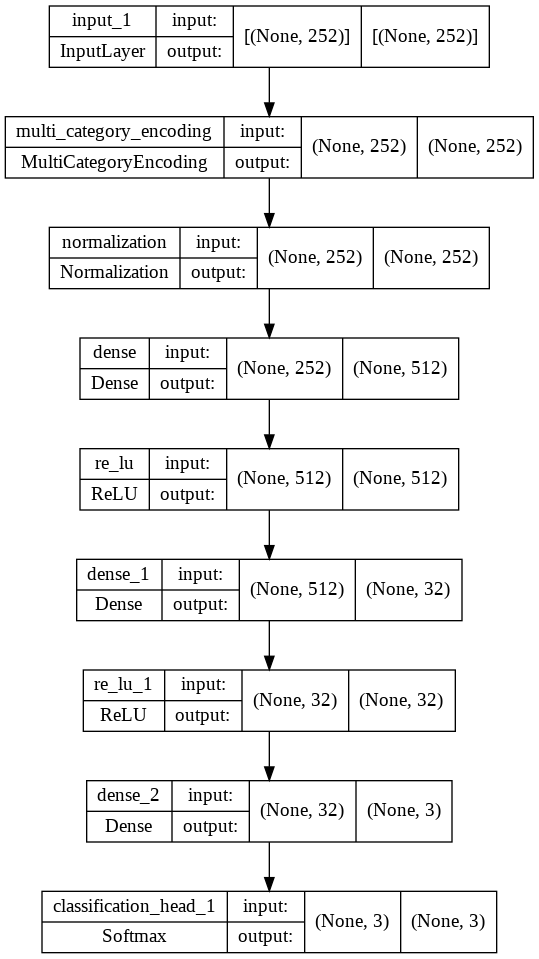

In [37]:
plot_model(model, show_shapes=True, show_layer_names=True)